<a href="https://colab.research.google.com/github/desve/vk-text-to-image-demo/blob/main/02_baseline_text2image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q diffusers transformers accelerate safetensors

import torch
from diffusers import StableDiffusionPipeline

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
).to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


# Проверка

  0%|          | 0/30 [00:00<?, ?it/s]

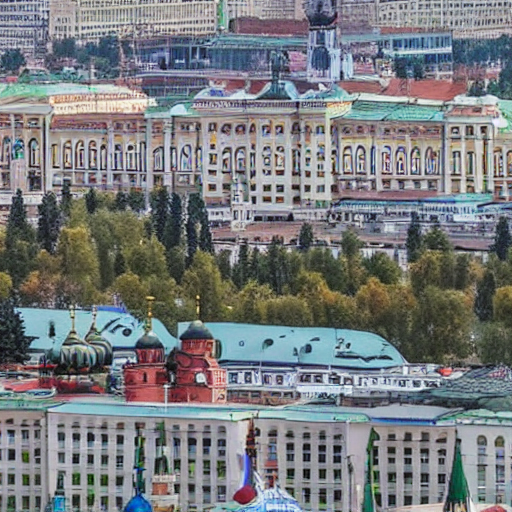

In [4]:
prompt = "молодой специалист по ИИ на фоне города будущего, стиль иллюстрации"
image = pipe(prompt, num_inference_steps=30).images[0]
image

Token indices sequence length is longer than the specified maximum sequence length for this model (111 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['она , яркая неоновая иллюстрация']


  0%|          | 0/20 [00:00<?, ?it/s]

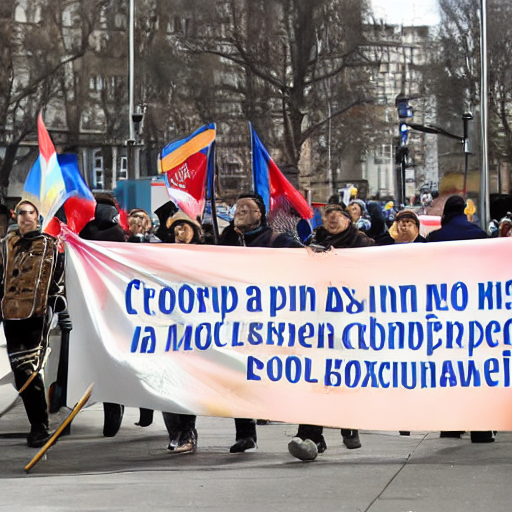

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ейронные сети , мотивирующий постер']


молодой специалист по ИИ представляет свой первый пет-проект на сцене хакатона, яркая неоновая иллюстрация


  0%|          | 0/20 [00:00<?, ?it/s]

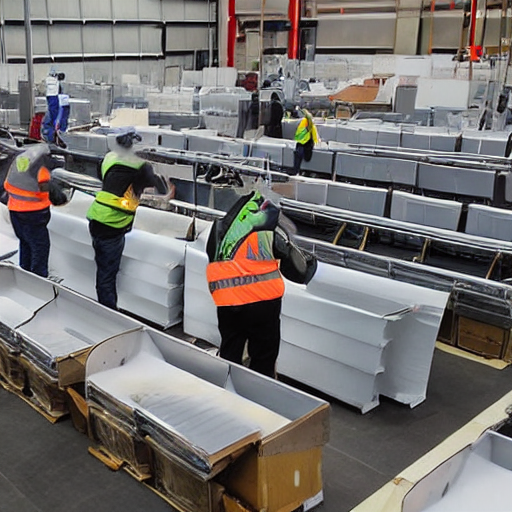

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ой живописи']


разработчик данных работает ночью за ноутбуком, вокруг парят графики и нейронные сети, мотивирующий постер


  0%|          | 0/20 [00:00<?, ?it/s]

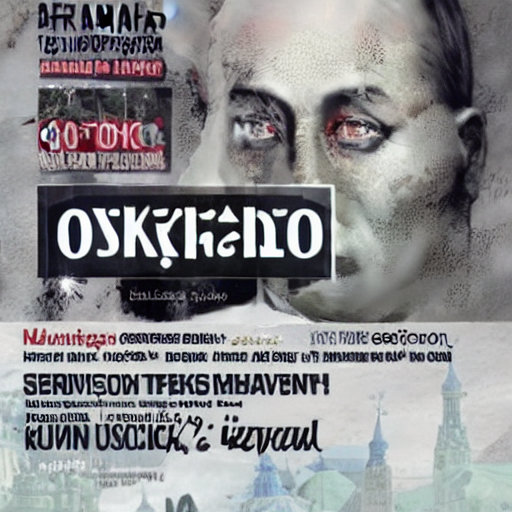

команда стажёров в офисе VK обсуждает идею, уютное освещение, стиль цифровой живописи


In [5]:
prompts = [
    "молодой специалист по ИИ представляет свой первый пет-проект на сцене хакатона, яркая неоновая иллюстрация",
    "разработчик данных работает ночью за ноутбуком, вокруг парят графики и нейронные сети, мотивирующий постер",
    "команда стажёров в офисе VK обсуждает идею, уютное освещение, стиль цифровой живописи"
]

images = []
for p in prompts:
    img = pipe(p, num_inference_steps=20).images[0]
    images.append(img)
    display(img)
    print(p)

# Настройки генерации

Для Stable Diffusion через diffusers базовые "ручки" такие:​
* num_inference_steps — сколько шагов диффузии. Меньше = быстрее, но грубее. Для быстрых тестов 15–25, для финальных картинок 30–40.
* guidance_scale — насколько строго модель следует тексту (обычно 5–9). Меньше — более творчески, больше — ближе к промпту, но иногда с артефактами.
* height, width — размер изображения (например, 512×512 или 768×512, если нужен “баннер”).

In [ ]:
def generate(prompt, steps=25, guidance=7.0, seed=None):
    generator = None
    if seed is not None:
        generator = torch.Generator(device=device).manual_seed(seed)

    image = pipe(
        prompt,
        num_inference_steps=steps,
        guidance_scale=guidance,
        generator=generator
    ).images[0]
    return image

## 1. Самопрезентация

In [ ]:
prompt = 'молодой специалист по ИИ с ноутбуком на сцене хакатона, улыбается и показывает слайд с нейросетью, яркая неоновая иллюстрация, современный стиль, мягкий свет'

In [ ]:
num_inference_steps = 20
guidance_scale = 5.5
generate(prompt, steps=num_inference_steps, guidance=guidance_scale, seed=None)